In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
import pandas as pd
import requests
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:

    html = StringIO(response.text)


    tables = pd.read_html(html)


    print(f"Total de tabelas encontradas: {len(tables)}")

   
    for i, table in enumerate(tables):
        print(f"Tabela {i+1} (Primeiras linhas):")
        print(table.head())
        print("\n")
    
else:
    print(f"Erro ao acessar a página: {response.status_code}")


Total de tabelas encontradas: 6
Tabela 1 (Primeiras linhas):
   Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536  


Tabela 2 (Primeiras linhas):
  Tesla Quarterly Revenue (Millions of US $)  \
0                                 2025-03-31   
1                                 2024-12-31   
2                                 2024-09-30   
3                                 2024-06-30   
4                                 2024-03-31   

  Tesla Quarterly Revenue (Millions of US $).1  
0                

In [7]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607503,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [14]:
import yfinance as yf

gamestop_stock = yf.download("GME", period="1y")

print(gamestop_stock.head())


[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
Price           Close       High        Low       Open     Volume
Ticker            GME        GME        GME        GME        GME
Date                                                             
2024-05-14  48.750000  64.830002  36.000000  64.830002  206979100
2024-05-15  39.549999  42.349998  31.000000  40.310001  131790100
2024-05-16  27.670000  35.240002  27.590000  33.980000   76177600
2024-05-17  22.209999  22.410000  19.700001  21.860001   96079600
2024-05-20  23.139999  23.400000  18.940001  21.540001   55261600


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_gme_revenue = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url_gme_revenue).text
soup = BeautifulSoup(html, "html.parser")

tables = soup.find_all("table")
data = []

if tables:
    table = tables[0]
    rows = table.find_all("tr")
    for row in rows[1:]:
        cols = row.find_all("td")
        cols = [col.text.strip() for col in cols]
        data.append(cols)

gme_revenue_df = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue_df["Revenue"] = gme_revenue_df["Revenue"].replace("[$,]", "", regex=True).astype(float)

print(gme_revenue_df.head())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


[*********************100%***********************]  1 of 1 completed


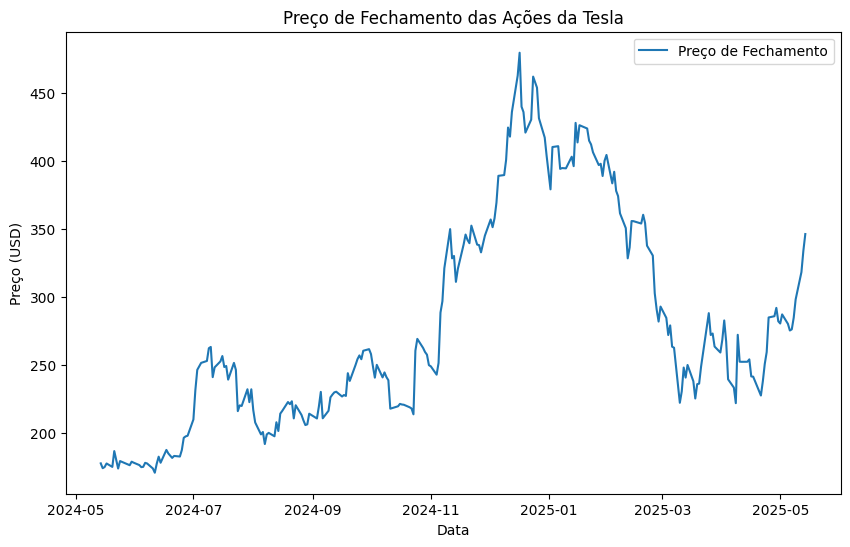

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

tesla_stock = yf.download("TSLA", period="1y")

plt.figure(figsize=(10,6))
plt.plot(tesla_stock['Close'], label="Preço de Fechamento")
plt.title("Preço de Fechamento das Ações da Tesla")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()


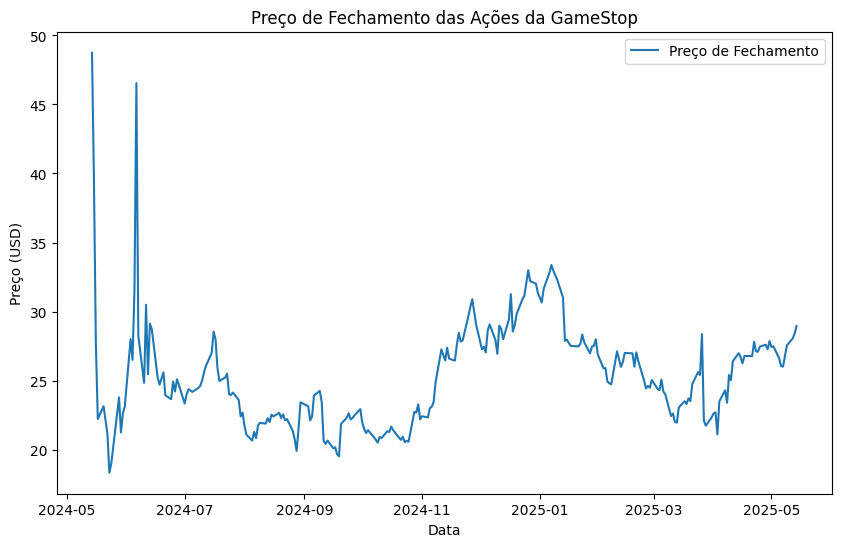

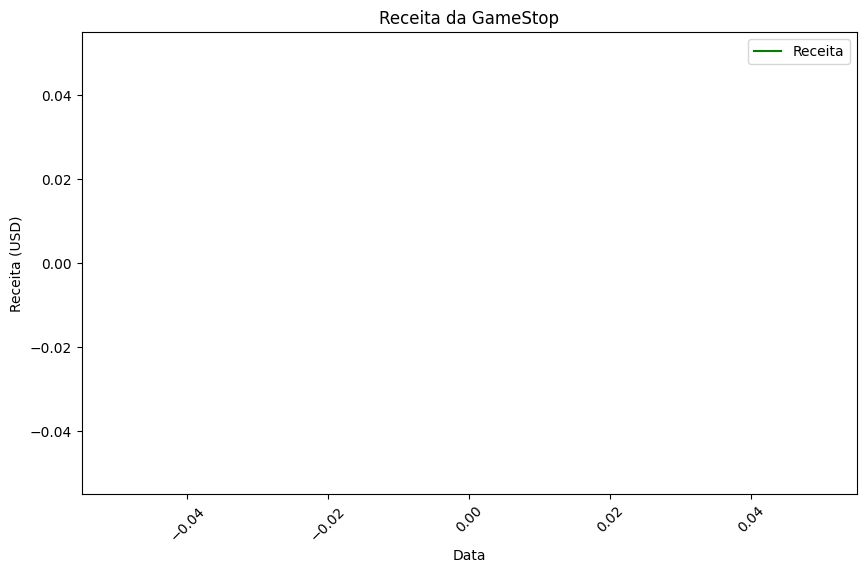

In [18]:
plt.figure(figsize=(10,6))
plt.plot(gamestop_stock['Close'], label="Preço de Fechamento")
plt.title("Preço de Fechamento das Ações da GameStop")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gme_revenue_df['Date'], gme_revenue_df['Revenue'], label="Receita", color='green')
plt.title("Receita da GameStop")
plt.xlabel("Data")
plt.ylabel("Receita (USD)")
plt.legend()
plt.xticks(rotation=45)
plt.show()